# The Brand Case Study

#### This notebook contains the exploratory data analysis for the Brand Case Study.The EDA explores data structure to reveal structure of the data and capture data points relevant to the given KPIs

In [163]:
#Import important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [164]:
#Load datasets
data = pd.read_csv("the_brand.csv")
data.head()

,date_id,mttnsubad,raw_account_id,raw_account_name,raw_publisher_id,raw_publisher_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,...,page_views_experience,event_install_fitnessplus_entitlements,cid_creative,event_install_tvplus_amplify_subscription,event_fitness_plus_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager
0,03/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
1,04/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
2,05/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
3,06/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
4,07/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0


## Exploratory Data Analysis

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Columns: 105 entries, date_id to phone_bf_engager
dtypes: float64(28), int64(36), object(41)
memory usage: 74.0+ KB


In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mttnsubad,90.0,2.837301e+06,764858.094525,0.0,2998299.75,3019066.0,3045897.00,3237783.0
raw_publisher_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raw_publisher_name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clicks,88.0,8.419318e+01,168.631943,0.0,6.75,19.5,54.25,688.0
video_starts,86.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...
event_install_mls_subscription,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
mac_bf_engager,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
watch_bf_engager,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
ipad_bf_engager,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0


In [165]:
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_df.index.name ="Column"
print("\nMissing Values Summary:")
missing_df


Missing Values Summary:


,Missing Values,Percentage
Column,,
date_id,0,0.0
mttnsubad,0,0.0
raw_account_id,0,0.0
raw_account_name,0,0.0
raw_publisher_id,90,100.0
...,...,...
event_install_mls_subscription,0,0.0
mac_bf_engager,0,0.0
watch_bf_engager,0,0.0


In [166]:
#What percentage of the columns have missing values
columns_with_missing_values =  missing_df[missing_df["Percentage"] > 0].reset_index()
number_of_columns_with_missing_values = columns_with_missing_values.shape[0]
percentage_missing = number_of_columns_with_missing_values / len(data.columns) * 100
print("\nNumber of Columns with Missing Values:" , number_of_columns_with_missing_values)
print("Percentage of Columns with Missing Values:" , round(percentage_missing,2),"%")


Number of Columns with Missing Values: 33
Percentage of Columns with Missing Values: 31.43 %


In [167]:
#Get all columns which dont have values ie 100% null
null_columns =  missing_df[missing_df["Percentage"] == 100].reset_index()
null_columns

,Column,Missing Values,Percentage
0,raw_publisher_id,90,100.0
1,raw_publisher_name,90,100.0
2,placement_tracking_type,90,100.0
3,creative_offer,90,100.0
4,page_views,90,100.0
5,airtags_add_to_cart_visits,90,100.0
6,app_downloads_vuze,90,100.0
7,cid_creative,90,100.0
8,event_fitness_plus_subscription,90,100.0


#### Observations
- Columns about bounces ,views and engager all have 0 as a value or null
- Most granular metrics like event_install,potential_watch_buyer_visit etc have zeros for all campaigns.This might be an indication that the data collection for those specific data points was not done properly(or data not available)
- 34 % of the columns have null values, some columns particulary user activity metrics do not have null values but zeros instead

In [168]:
#Remove columns with  no values ie percentage of missing values is 100
columns_to_remove = null_columns["Column"].tolist()
# Remove those columns from the 'data' DataFrame
data = data.drop(columns=columns_to_remove)
data.head()

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,total_seconds_spent_experience,page_views_dotcom,page_views_experience,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [169]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [170]:
#Since we will be comparing values either as in the US or Worldwide, create a new column to classify as US or Worldwide
data["Country"] = data["market"].apply(lambda x: "US" if x == "United States" else "Worldwide")
data

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,page_views_dotcom,page_views_experience,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,Country
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,US
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,US
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,US
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,US
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,13/01/2023,0,727787507,THE BRAND IN (INR),163391,Q223/Q323 Upgraders Programmatic Display,3237781,03067959_wwa_in_dis_phModeln_phnupabc_pdis_dv3...,1031432,INEN_UPG_DCO_320x480_BAN_ALL_NA_AIP_NA_NA_NA_NA,...,0,0,0,0,0,0,0,0,0,Worldwide
86,13/01/2023,0,4471534,TheBrand_EUR,1074569554,02967646_Marcom_Digital_phone_2023 phone model...,1078838883,03065507_wwa_es_dis_phModeln_phnupabc_pdis_dv3...,na,ESES_14PV11_STATIC_320x480_BAN_YXIVPL_BBDSPL_N...,...,0,0,0,0,0,0,0,0,0,Worldwide
87,13/01/2023,0,5183348,THE BRAND Canada,1074569600,02967646_Marcom_Digital_phone_2023 phone model...,1078840353,02977633_WWA_CA_DIS_phModelN_phnupabc_PDIS_DV3...,na,Prima-Donna-CAFR-Upgraders-414x736,...,0,0,0,0,0,0,0,0,0,Worldwide
88,13/01/2023,0,4029436,THE BRAND KR (KRW),1074570016,02967646_Marcom_Digital_phone_2023 phone model...,1078841457,03000201_wwa_kr_dis_phModeln_phnupabc_pdis_dv3...,na,Prima-Donna-KR-Upgraders-300x250,...,0,0,0,0,0,0,0,0,0,Worldwide


## Univariate Analysis

In [ ]:
#Explore the volume, cost and efficiency columns to identify distribution and fix any outlier issues

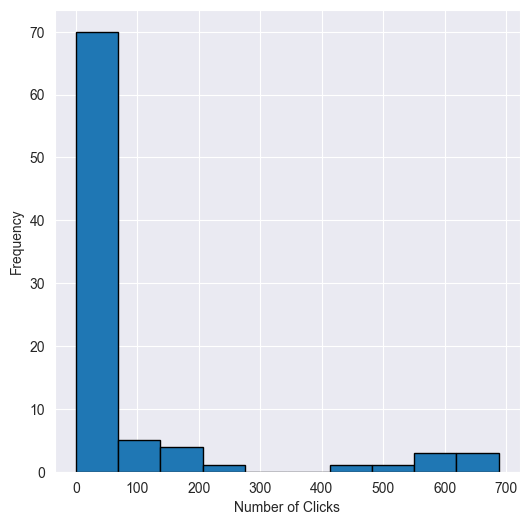

In [171]:
# Clicks distribution
# Check  the distribution of clicks
plt.figure(figsize = (6,6))
plt.hist(data["clicks"], bins=10, edgecolor='k')
plt.ylabel("Frequency")
plt.xlabel("Number of Clicks");

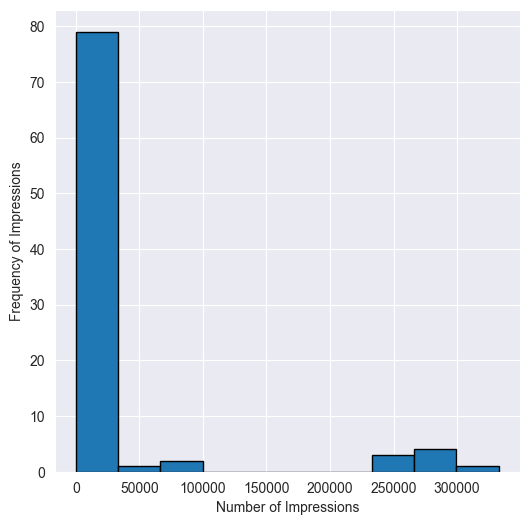

In [106]:
# Impresssions distribution
plt.figure(figsize = (6,6))
plt.hist(data["impressions"], bins=10, edgecolor='k')
plt.ylabel("Frequency of Impressions")
plt.xlabel("Number of Impressions");

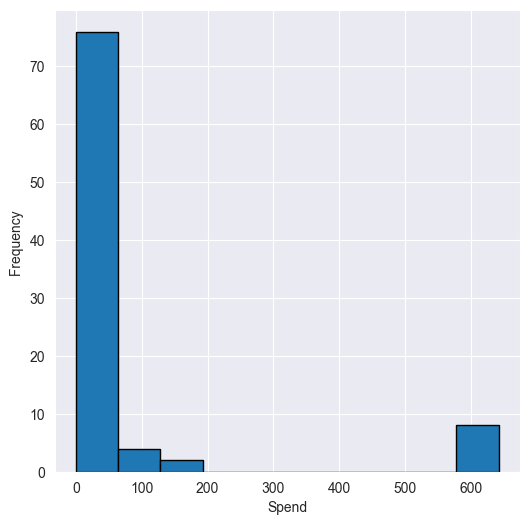

In [172]:
# Check  the distribution of spend
plt.figure(figsize = (6,6))
plt.hist(data["spend_net_usd"], bins=10, edgecolor='k')
plt.ylabel("Frequency ")
plt.xlabel("Spend");

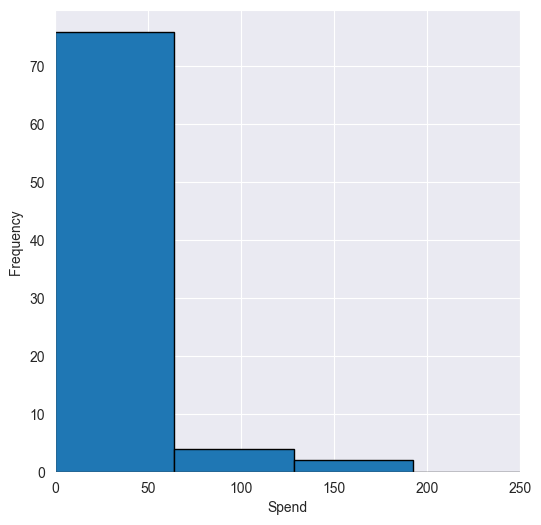

In [173]:
# Make it more granular by limiting to spend of 250
plt.figure(figsize = (6,6))
plt.hist(data["spend_net_usd"], bins=10, edgecolor='k')
plt.xlim(0,250)
plt.ylabel("Frequency ")
plt.xlabel("Spend");

In [303]:
# Check campaigns where number of clicks if greater than 100
higher_clicks = data[data["clicks"] > 100]
higher_clicks = higher_clicks[["raw_campaign_id","engagements" ,"clicks","impressions","spend_net_usd","publisher"]]
higher_clicks["CTR"] = higher_clicks["clicks"]/higher_clicks["impressions"] * 100
higher_clicks

Column,raw_campaign_id,engagements,clicks,impressions,spend_net_usd,publisher,CTR
0,32103862,2639.0,688.0,332738,620.3200,Twitter,0.206769
1,32103862,2163.0,649.0,291180,614.9800,Twitter,0.222886
2,32103862,2145.0,570.0,279124,586.2100,Twitter,0.204210
3,32103862,1801.0,481.0,236867,591.1000,Twitter,0.203068
4,32103862,2013.0,518.0,249517,598.6000,Twitter,0.207601
5,32103862,2255.0,597.0,262640,631.5100,Twitter,0.227307
6,32103862,1999.0,591.0,276955,613.4400,Twitter,0.213392
32,32103862,2118.0,648.0,288659,642.3700,Twitter,0.224486
38,32207470,229.0,132.0,12361,10.9218,Twitter,1.067875
46,4b79bebe-d9b2-48d6-8f34-2ec90e520cb3,0.0,153.0,21043,30.6000,Snapchat,0.727083


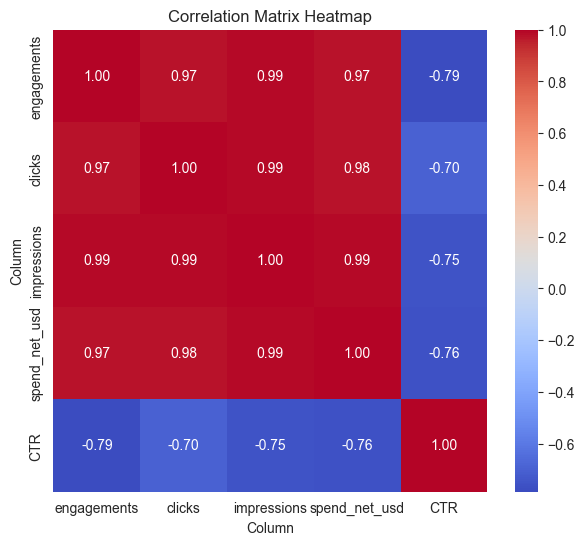

In [306]:


# Selecting the desired columns
columns_of_interest = ["raw_campaign_id", "engagements", "clicks", "impressions", "spend_net_usd", "publisher", "CTR"]

# Filter numeric columns only
numeric_data = higher_clicks[columns_of_interest].select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
correlation_matrix

plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


#### Observations
- Distributions are centered around the edges
- No/low middle values
- Most of the values are concentrated on the lower end of the x-axis (close to 0).
- A few campaigns have significantly higher clicks (e.g., 500–700 range). These campaigns could be anomalies or high-performing campaigns compared to the others

#### Exploring relationships between important variables

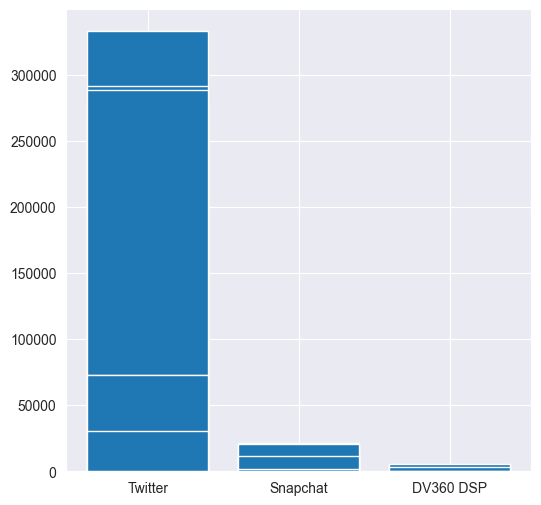

In [174]:
# Volume of views per channel
#Impresssions by publisher
views = data[["publisher","impressions"]]
plt.figure(figsize = (6,6))
plt.bar(views["publisher"],views["impressions"]);

In [175]:
#Agregate Number of impressions per campaign
new_campaign = data.groupby(["raw_campaign_id"])["impressions"].sum().reset_index(name="Total Impressions")
new_campaign

,raw_campaign_id,Total Impressions
0,1074569554,5389
1,1074569600,8
2,1074570016,2891
3,162649,3336
4,163391,2308
5,32093754,54472
6,32094297,9124
7,32103862,2217680
8,32134425,30543
9,32134430,30459


In [176]:
new_campaign.sort_values(by="Total Impressions", ascending=False, inplace=True)
new_campaign

,raw_campaign_id,Total Impressions
7,32103862,2217680
22,32252202,165268
18,32207469,62795
32,4b79bebe-d9b2-48d6-8f34-2ec90e520cb3,59189
5,32093754,54472
39,e36e948f-7f26-4ff5-b6a3-009244adcbfa,37425
8,32134425,30543
9,32134430,30459
13,32134438,28000
19,32207470,22958


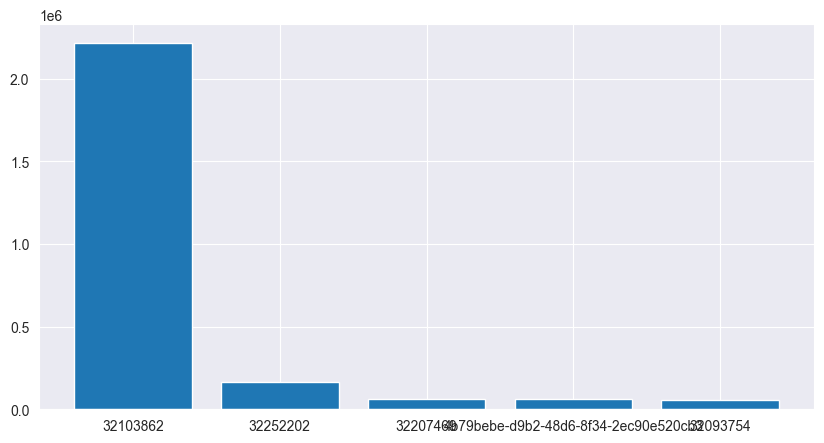

In [177]:
#Top campaign runs by impressions
top_5_campaigns_impressions = new_campaign.head(5)
plt.figure(figsize = (10,5))
plt.bar(top_5_campaigns_impressions ["raw_campaign_id"],top_5_campaigns_impressions ["Total Impressions"]);

In [178]:
# Calculating campaign KPIs
data["CTR"] = data["clicks"]/data["impressions"] * 100
data["QVR"] = data["engagements"]/data["impressions"] * 100
data["CPCV"] = data["spend_net_usd"]/data["impressions"]
data["CPC"] = data["spend_net_usd"]/data["clicks"]
data["CPVT"] = data["spend_net_usd"]/data["engagements"]

In [179]:
# Replace inf and -inf with 0
data.replace([np.inf, -np.inf], 0, inplace=True)

In [180]:
#Campaign Run time
campaign_start_date = data["date_id"].min()
campaign_end_date = data["date_id"].max()
print(f"Campaign Duration : {campaign_start_date} - {campaign_end_date}")

Campaign Duration : 03/01/2023 - 21/01/2023


In [181]:
#Correct Date Format
data["date_id"] = pd.to_datetime(data["date_id"],dayfirst=True)


In [182]:
#Campaign Markets
data["market"].unique().tolist()

['United States',
 'Japan',
 'Saudi Arabia',
 'Turkey',
 'Canada',
 'Switzerland',
 'France',
 'Germany',
 'Taiwan',
 'Spain',
 'United Kingdom',
 'United Arab Emirates',
 'India',
 'Malaysia',
 'Italy',
 'Australia',
 'Singapore',
 'South Korea',
 'Thailand']

In [183]:
# Campaign Channels
data["publisher"].unique().tolist()

['Twitter', 'Snapchat', 'DV360 DSP']

In [184]:
# Strategies Applied To The Campaign

# Creatives used
data["creative"].unique().tolist()

['phone modelabc Plus vs. phone modelxyz Display Size',
 'phone modelabc Plus vs. phone X Display Size',
 'phone modelabc Plus vs. phone 8 Plus Display Size',
 'phone modelabc vs. phone 8 Display Size',
 'phone modelabc vs. phone 8 Display Size - IN only',
 'phone modelabc Plus vs. phone modelxyz Display Size - IN only',
 'phone modelabc Plus vs. phone 8 Plus Display Size - IN only',
 'phone modelabc Plus vs. phone X Display Size - IN only']

In [185]:
# Creatives  formats used
data["creative_format"].unique().tolist()

['Static']

In [186]:
# Devices Targeted
data["audience_device_targeted"].value_counts()

audience_device_targeted
phone modelxyz Device Targeting           28
phone X Device Targeting                  19
phone 8 Plus Device Targeting             14
phone 8 Device Targeting                   7
phone XR Device Targeting                  5
phone 7 Device Targeting                   4
phone XS Device Targeting                  3
phone XR, 11, 12 Device Targeting          3
All iOS Device Targeting                   2
phone 7 Plus & 8 Plus Device Targeting     2
phone 7 & 8 Device Targeting               1
phone XS & X Device Targeting              1
phone 12 Device Targeting                  1
Name: count, dtype: int64

In [187]:
# Creative Products
data["creative_product"].value_counts()

creative_product
phone modelabc Plus    77
phone modelabc         13
Name: count, dtype: int64

In [188]:
# Creative Features
data["creative_feature"].value_counts()

creative_feature
Display / Upgrade your display to bigger and better    90
Name: count, dtype: int64

In [189]:
# Creative CTA
data["creative_cta"].value_counts()

creative_cta
Upgrade Now    64
Name: count, dtype: int64

In [295]:
# Creative dimensions used
data["creative_dimensions"].unique().tolist()

['1:1 AR', '9:16 AR', '320x480', '414x736', '300x250']

## KPIs

In [ ]:
# Volume, Efficiency & Cost

In [ ]:
# Most of the effeciency values cannot be calculated because they are zeros or missing values for other data points
# KPI comparison will be done on regional basis ie US Vs Worldwide

#### CAMPAIGN VOLUME BY REGION

In [190]:
#Regional views(Volume)
regional_views_volume = data.groupby(["Country"])["impressions"].sum().reset_index()
regional_views_volume

,Country,impressions
0,US,2217680
1,Worldwide,738350


In [191]:
#Regional Views( Cost Per View)
regional_views_cost = data.groupby(["Country"])["CPCV"].mean().reset_index()
regional_views_cost

,Country,CPCV
0,US,0.002227
1,Worldwide,0.005309


In [192]:
#Regional(Market) Views( Cost Per View)
market_views_cost = data.groupby(["market"])["CPCV"].mean().reset_index()
market_views_cost

,market,CPCV
0,Australia,0.002601
1,Canada,0.004727
2,France,0.002304
3,Germany,0.006555
4,India,0.014054
5,Italy,0.011403
6,Japan,0.001214
7,Malaysia,0.002538
8,Saudi Arabia,0.002012
9,Singapore,0.001435


In [ ]:
### Clicks

In [193]:
#Regional clicks(Volume)
regional_clicks_volume = data.groupby(["Country"])["clicks"].sum().reset_index()
regional_clicks_volume

,Country,clicks
0,US,4742.0
1,Worldwide,2667.0


In [194]:
#Regional Clicks( Cost Per Click)
regional_clicks_cost = data.groupby(["Country"])["CPC"].mean().reset_index()
regional_clicks_cost

,Country,CPC
0,US,1.043654
1,Worldwide,1.815122


In [195]:
#Regional(Market) Clicks( Average Cost Per Click)
market_clicks_cost = data.groupby(["market"])["CPCV"].mean().reset_index()
market_clicks_cost

,market,CPCV
0,Australia,0.002601
1,Canada,0.004727
2,France,0.002304
3,Germany,0.006555
4,India,0.014054
5,Italy,0.011403
6,Japan,0.001214
7,Malaysia,0.002538
8,Saudi Arabia,0.002012
9,Singapore,0.001435


In [196]:
#Regional Average CTR
regional_clicks_ctr = data.groupby(["Country"])["CTR"].mean().reset_index()
regional_clicks_ctr

,Country,CTR
0,US,0.213715
1,Worldwide,0.378919


In [ ]:
# Consideration

In [197]:
# Regional engagements per visit
regional_engagements_volume = data.groupby(["Country"])["engagements"].sum().reset_index()
regional_engagements_volume

,Country,engagements
0,US,17133.0
1,Worldwide,5317.0


In [198]:
#Average Regional QVR
regional_qvr = data.groupby(["Country"])["QVR"].mean().reset_index()
regional_qvr

,Country,QVR
0,US,0.773205
1,Worldwide,0.571791


In [199]:
#Average Regional Cost per qualified(engagement) visit
regional_cpvt= data.groupby(["Country"])["CPVT"].mean().reset_index()
regional_cpvt

,Country,CPVT
0,US,0.288557
1,Worldwide,0.151648


## Trends

In [ ]:
# How do engagements change over the course of the campaign

In [ ]:
#Select relevant columns
df = data[["clicks","spend_net_usd","CTR","QVR","CPCV","CPC","CPVT"]]

In [210]:
# Group by 'date_id' and calculate averages and totals
result = data.groupby(["date_id","Country"]).agg(
    avg_ctr=("CTR", "mean"),
    avg_qvr=("QVR", "mean"),
    avg_cpcv=("CPCV", "mean"),
    avg_cpc=("CPC", "mean"),
    avg_cpvt=("CPVT", "mean"),
    avg_clicks=("clicks", "mean"),
    avg_engagements=("engagements", "mean"),
    avg_impressions=("impressions", "mean"),
    total_spend_net_usd=("spend_net_usd", "sum")
).reset_index()
result

,date_id,Country,avg_ctr,avg_qvr,avg_cpcv,avg_cpc,avg_cpvt,avg_clicks,avg_engagements,avg_impressions,total_spend_net_usd
0,2023-01-03,US,0.206769,0.793117,0.001864,0.901628,0.235059,688.000000,2639.000000,332738.000000,620.3200
1,2023-01-04,US,0.222886,0.742839,0.002112,0.947581,0.284318,649.000000,2163.000000,291180.000000,614.9800
2,2023-01-05,US,0.204210,0.768476,0.002100,1.028439,0.273291,570.000000,2145.000000,279124.000000,586.2100
3,2023-01-06,US,0.203068,0.760342,0.002495,1.228898,0.328207,481.000000,1801.000000,236867.000000,591.1000
4,2023-01-07,US,0.207601,0.806759,0.002399,1.155598,0.297367,518.000000,2013.000000,249517.000000,598.6000
5,2023-01-08,US,0.227307,0.858590,0.002404,1.057806,0.280049,597.000000,2255.000000,262640.000000,631.5100
6,2023-01-09,US,0.213392,0.721778,0.002215,1.037970,0.306873,591.000000,1999.000000,276955.000000,613.4400
7,2023-01-10,Worldwide,0.430729,0.603795,0.002674,0.776419,0.233442,24.857143,41.857143,6307.857143,87.2744
8,2023-01-11,Worldwide,0.448900,0.318768,0.002993,0.768437,0.076573,37.800000,23.400000,9345.600000,112.8529
9,2023-01-12,Worldwide,0.328017,0.452077,0.003825,0.603983,0.069938,13.333333,17.333333,3543.166667,70.2444


In [211]:
#Seperate data by region
us_data = result[result['Country'] == "US"]
worldwide_data = result[result['Country'] == "Worldwide"]

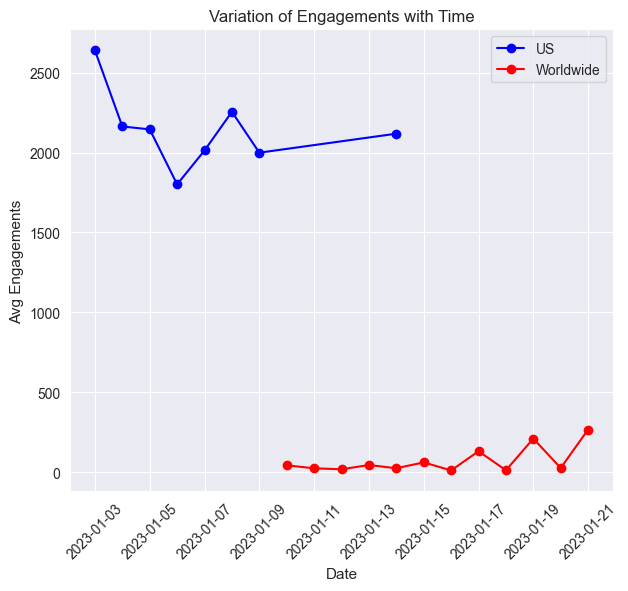

In [216]:
# Plotting Engagement variation over the course of the campaign
plt.figure(figsize=(7, 6))

# US line plot
plt.plot(
    us_data['date_id'],
    us_data['avg_engagements'],
    marker='o',
    linestyle='-',
    color='b',
    label='US'
)

# Worldwide line plot
plt.plot(
    worldwide_data['date_id'],
    worldwide_data['avg_engagements'],
    marker='o',
    linestyle='-',
    color='r',
    label='Worldwide'
)

# Customizing the plot
plt.title('Variation of Engagements with Time', fontsize=12)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Avg Engagements', fontsize=11)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show();


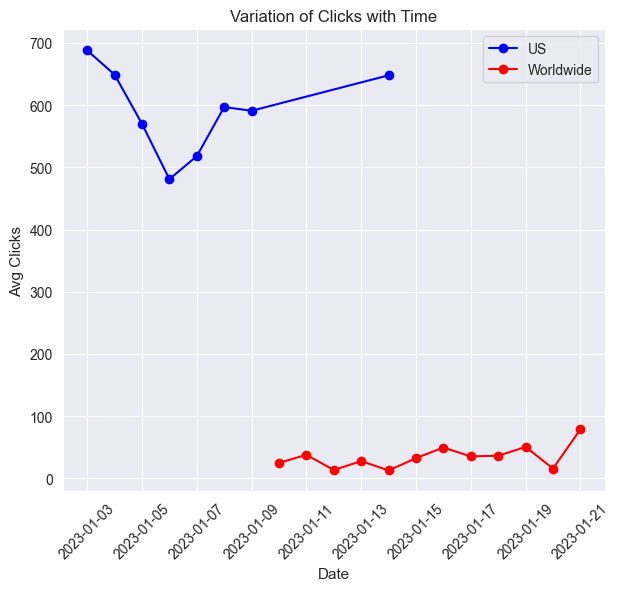

In [217]:

# Plotting Engagement variation over the course of the campaign
plt.figure(figsize=(7, 6))

# US line plot
plt.plot(
    us_data['date_id'],
    us_data['avg_clicks'],
    marker='o',
    linestyle='-',
    color='b',
    label='US'
)

# Worldwide line plot
plt.plot(
    worldwide_data['date_id'],
    worldwide_data['avg_clicks'],
    marker='o',
    linestyle='-',
    color='r',
    label='Worldwide'
)

# Customizing the plot
plt.title('Variation of Clicks with Time', fontsize=12)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Avg Clicks', fontsize=11)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show();


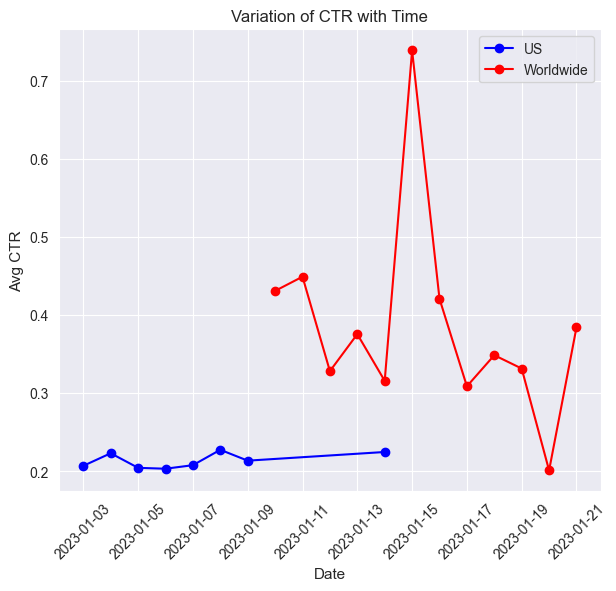

In [293]:

# Plotting CTR variation over the course of the campaign
plt.figure(figsize=(7, 6))

# US line plot
plt.plot(
    us_data['date_id'],
    us_data['avg_ctr'],
    marker='o',
    linestyle='-',
    color='b',
    label='US'
)

# Worldwide line plot
plt.plot(
    worldwide_data['date_id'],
    worldwide_data['avg_ctr'],
    marker='o',
    linestyle='-',
    color='r',
    label='Worldwide'
)

# Customizing the plot
plt.title('Variation of CTR with Time', fontsize=12)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Avg CTR', fontsize=11)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show();


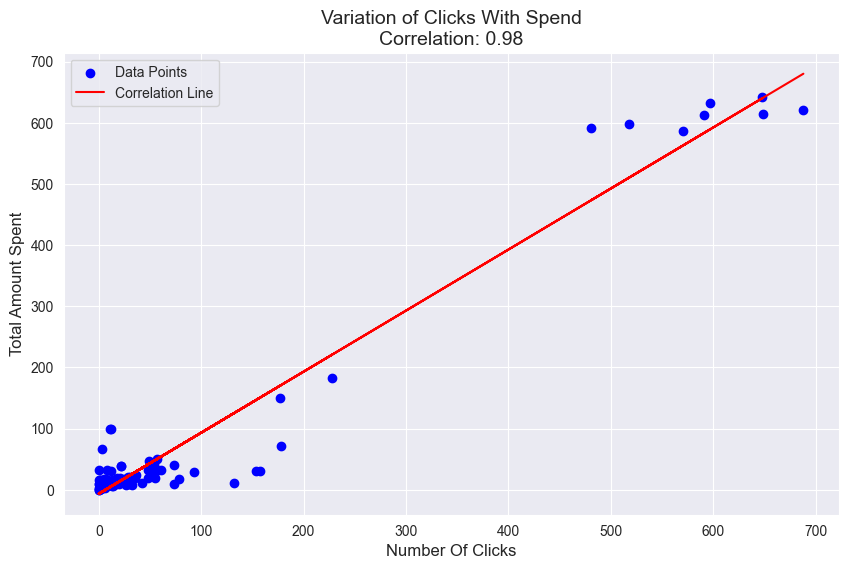

In [226]:
#Overall variation of spend with clicks

# Remove rows with NaN or infinite values
data_cleaned = data.dropna(subset=['clicks', 'spend_net_usd'])  # Remove rows with NaN
data_cleaned = data_cleaned[np.isfinite(data_cleaned['clicks']) & np.isfinite(data_cleaned['spend_net_usd'])]  # Remove rows with infinite values

# Scatter plot
plt.figure(figsize=(7, 6))
plt.scatter(
    x=data_cleaned['clicks'],
    y=data_cleaned['spend_net_usd'],
    color='blue',
    label='Data Points'
)

# Calculate and plot correlation line
m, b = np.polyfit(data_cleaned['clicks'], data_cleaned['spend_net_usd'], 1)  # Linear regression
plt.plot(data_cleaned['clicks'], m * data_cleaned['clicks'] + b, color='red', label='Correlation Line')

# Calculate correlation coefficient
correlation = np.corrcoef(data_cleaned['clicks'], data_cleaned['spend_net_usd'])[0, 1]

# Customizing the plot
plt.title(f'Variation of Clicks With Spend\nCorrelation: {correlation:.2f}', fontsize=14)
plt.xlabel('Number Of Clicks', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


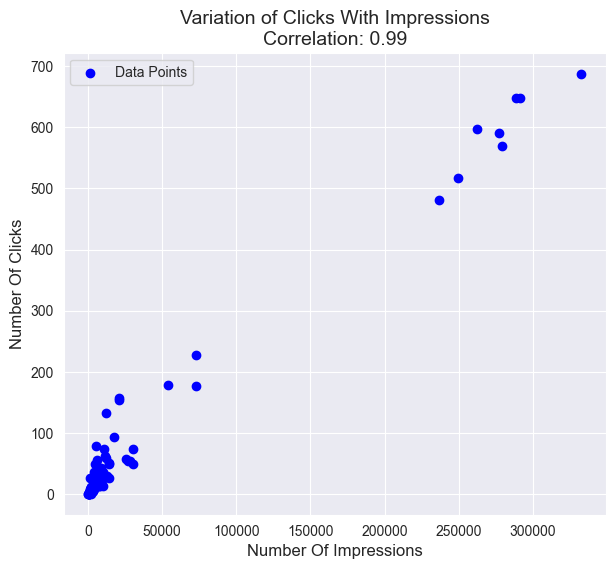

In [232]:
# Relationship between number of clicks and impressions

# Remove rows with NaN or infinite values
data_cleaned = data.dropna(subset=['impressions', 'clicks'])  # Remove rows with NaN
data_cleaned = data_cleaned[np.isfinite(data_cleaned['impressions']) & np.isfinite(data_cleaned['clicks'])]  # Remove rows with infinite values

# Scatter plot
plt.figure(figsize=(7, 6))
plt.scatter(
    x=data_cleaned['impressions'],
    y=data_cleaned['clicks'],
    color='blue',
    label='Data Points'
)

# Calculate correlation coefficient
correlation = np.corrcoef(data_cleaned['impressions'], data_cleaned['clicks'])[0, 1]

# Customizing the plot
plt.title(f'Variation of Clicks With Impressions\nCorrelation: {correlation:.2f}', fontsize=14)
plt.xlabel('Number Of Impressions', fontsize=12)
plt.ylabel('Number Of Clicks', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


#### Observations
- The US has an overall number of impressions and clicks than the rest of the world
- The number of impressions/clicks tend to fluctuate in faction for the rest of the world
- Clicks were plummeting in the US the first few days of the campaign before they started picking up
- The number of clicks is strongly positively correlated to the number of impressions.
- The number of clicks increase the more we spend on the campaign

In [269]:
# What are the attributes of the best and worst campaigns based on KPIs volume(views&clicks),effeciency(CTR) and cost(CPC)
sorted_data = data.sort_values(by=['clicks', 'impressions','engagements','CTR'], ascending=False)
sorted_data

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,Country,CTR,QVR,CPCV,CPC,CPVT
0,2023-01-03,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,US,0.206769,0.793117,0.001864,0.901628,0.235059
1,2023-01-04,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,US,0.222886,0.742839,0.002112,0.947581,0.284318
32,2023-01-14,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,US,0.224486,0.733738,0.002225,0.991312,0.303291
5,2023-01-08,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,US,0.227307,0.858590,0.002404,1.057806,0.280049
6,2023-01-09,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,US,0.213392,0.721778,0.002215,1.037970,0.306873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,2023-01-15,3007265,4.5036E+15,THE BRAND EMEA MAL 2 - NEW,32207467,ae2302phModel6-aear-phnupabc-eur-tw-twi-cpc-av...,40655878,03007265_wwa_ae_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,Worldwide,0.000000,0.617284,0.000000,NaN,0.000000
33,2023-01-14,3045903,44868f32-cb85-4834-bd46-96a485bc74d5,The Brand -Marcom - EMEA - EUR - 5.0,4ad04551-8527-4856-bc0d-dc1455d51aa2,IT2302phModel6-IT-phnupabc-EUR-SNA-SNA-CPC-Ava...,0c2974ce-4caf-46eb-972c-71d827c3d7f4,03045903_wwa_it_soc_phModeln_phnupabc_socl_sna...,1b5f4199-28e0-43aa-8145-2046c07e5054,03045903_wwa_it_soc_phModeln_phnupabc_socl_sna...,...,0,0,0,0,Worldwide,0.000000,0.000000,0.012326,0.000000,0.000000
73,2023-01-20,3045903,44868f32-cb85-4834-bd46-96a485bc74d5,The Brand -Marcom - EMEA - EUR - 5.0,4ad04551-8527-4856-bc0d-dc1455d51aa2,IT2302phModel6-IT-phnupabc-EUR-SNA-SNA-CPC-Ava...,0c2974ce-4caf-46eb-972c-71d827c3d7f4,03045903_wwa_it_soc_phModeln_phnupabc_socl_sna...,1b5f4199-28e0-43aa-8145-2046c07e5054,03045903_wwa_it_soc_phModeln_phnupabc_socl_sna...,...,0,0,0,0,Worldwide,0.000000,0.000000,0.010481,0.000000,0.000000
89,2023-01-13,0,5183348,THE BRAND Canada,1074569600,02967646_Marcom_Digital_phone_2023 phone model...,1078840369,02977667_WWA_CA_DIS_phModelN_phnupabc_PDIS_DV3...,na,Prima-Donna-CAFR-Upgraders-414x736,...,0,0,0,0,Worldwide,NaN,0.000000,0.003100,NaN,0.000000


In [270]:
strategy_columns = sorted_data[["raw_campaign_id","market","campaign","platform","publisher","creative","audience_device_targeted","placement_type","creative_cta","clicks","engagements","audience_targeting_segment","creative_dimensions","creative_carrier","creative_copy","spend_net_usd","CTR"]]
strategy_columns

Column,raw_campaign_id,market,campaign,platform,publisher,creative,audience_device_targeted,placement_type,creative_cta,clicks,engagements,audience_targeting_segment,creative_dimensions,creative_carrier,creative_copy,spend_net_usd,CTR
0,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,688.0,2639.0,Broad Audience,1:1 AR,NaN,phModeldef,620.3200,0.206769
1,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,649.0,2163.0,Broad Audience,1:1 AR,NaN,phModeldef,614.9800,0.222886
32,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,648.0,2118.0,Broad Audience,1:1 AR,NaN,phModeldef,642.3700,0.224486
5,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,597.0,2255.0,Broad Audience,1:1 AR,NaN,phModeldef,631.5100,0.227307
6,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,591.0,1999.0,Broad Audience,1:1 AR,NaN,phModeldef,613.4400,0.213392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,32207467,United Arab Emirates,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone 8 Plus Display Size,phone 8 Plus Device Targeting,In-Feed,Upgrade Now,0.0,2.0,Broad Audience,1:1 AR,NaN,NaN,0.0000,0.000000
33,4ad04551-8527-4856-bc0d-dc1455d51aa2,Italy,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc vs. phone 8 Display Size,phone 8 Device Targeting,User Stories,NaN,0.0,0.0,Photography,9:16 AR,NaN,phModel8,2.9212,0.000000
73,4ad04551-8527-4856-bc0d-dc1455d51aa2,Italy,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc vs. phone 8 Display Size,phone 8 Device Targeting,User Stories,NaN,0.0,0.0,Photography,9:16 AR,NaN,phModel8,0.5450,0.000000
89,1074569600,Canada,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc vs. phone 8 Display Size,All iOS Device Targeting,Standard Banner,Upgrade Now,NaN,0.0,Custom Intent,414x736,Telus,NaN,0.0155,NaN


In [272]:
#Choose top 10 and bottom 10 campaigns and analyse thier attributes
top_10_campaigns = strategy_columns.head(10)
bottom_10_campaigns = strategy_columns.tail(10)

In [273]:
#Check the top 10 campaigns
top_10_campaigns

Column,raw_campaign_id,market,campaign,platform,publisher,creative,audience_device_targeted,placement_type,creative_cta,clicks,engagements,audience_targeting_segment,creative_dimensions,creative_carrier,creative_copy,spend_net_usd,CTR
0,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,688.0,2639.0,Broad Audience,1:1 AR,NaN,phModeldef,620.3200,0.206769
1,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,649.0,2163.0,Broad Audience,1:1 AR,NaN,phModeldef,614.9800,0.222886
32,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,648.0,2118.0,Broad Audience,1:1 AR,NaN,phModeldef,642.3700,0.224486
5,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,597.0,2255.0,Broad Audience,1:1 AR,NaN,phModeldef,631.5100,0.227307
6,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,591.0,1999.0,Broad Audience,1:1 AR,NaN,phModeldef,613.4400,0.213392
2,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,570.0,2145.0,Broad Audience,1:1 AR,NaN,phModeldef,586.2100,0.204210
4,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,518.0,2013.0,Broad Audience,1:1 AR,NaN,phModeldef,598.6000,0.207601
3,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,481.0,1801.0,Broad Audience,1:1 AR,NaN,phModeldef,591.1000,0.203068
69,32252202,United Kingdom,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,NaN,228.0,740.0,Broad Audience,1:1 AR,NaN,phModeldef,183.0732,0.313200
55,32207469,Saudi Arabia,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,178.0,741.0,Broad Audience,1:1 AR,NaN,NaN,72.1689,0.328899


In [278]:
#Check combination of creatives in top 10
# Define the columns related to 'creative' and include CTR
creative_columns_with_ctr = [
    'creative',
    'creative_cta',
    'creative_dimensions',
    'creative_carrier',
    'creative_copy','publisher',
    'market',
]

# Extract unique combinations and sort by CTR
unique_creative_combinations = (
    top_10_campaigns[creative_columns_with_ctr]
    .drop_duplicates()
)
# Display the result
unique_creative_combinations


Column,creative,creative_cta,creative_dimensions,creative_carrier,creative_copy,publisher,market
0,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,1:1 AR,NaN,phModeldef,Twitter,United States
69,phone modelabc Plus vs. phone modelxyz Display...,NaN,1:1 AR,NaN,phModeldef,Twitter,United Kingdom
55,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,1:1 AR,NaN,NaN,Twitter,Saudi Arabia


In [279]:
top_10_campaigns

Column,raw_campaign_id,market,campaign,platform,publisher,creative,audience_device_targeted,placement_type,creative_cta,clicks,engagements,audience_targeting_segment,creative_dimensions,creative_carrier,creative_copy,spend_net_usd,CTR
0,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,688.0,2639.0,Broad Audience,1:1 AR,NaN,phModeldef,620.3200,0.206769
1,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,649.0,2163.0,Broad Audience,1:1 AR,NaN,phModeldef,614.9800,0.222886
32,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,648.0,2118.0,Broad Audience,1:1 AR,NaN,phModeldef,642.3700,0.224486
5,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,597.0,2255.0,Broad Audience,1:1 AR,NaN,phModeldef,631.5100,0.227307
6,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,591.0,1999.0,Broad Audience,1:1 AR,NaN,phModeldef,613.4400,0.213392
2,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,570.0,2145.0,Broad Audience,1:1 AR,NaN,phModeldef,586.2100,0.204210
4,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,518.0,2013.0,Broad Audience,1:1 AR,NaN,phModeldef,598.6000,0.207601
3,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,481.0,1801.0,Broad Audience,1:1 AR,NaN,phModeldef,591.1000,0.203068
69,32252202,United Kingdom,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,NaN,228.0,740.0,Broad Audience,1:1 AR,NaN,phModeldef,183.0732,0.313200
55,32207469,Saudi Arabia,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,178.0,741.0,Broad Audience,1:1 AR,NaN,NaN,72.1689,0.328899


### Top 10 campaigns had these values
- Creative Dimensions :  1:1 AR
- Creative Carrier :    NaN
- Audience Targeting Segment : Broad Audience
- Creative Copy : phModeldef
- Average Clicks Volume : 515
- Average CTR : 0.24%
- Spend  : Very high spend , average of $515
- Creative CTA : Upgrade Now
- Placement Type : In-Feed
- Market : US
- Publisher : Twitter


In [283]:
bottom_10_campaigns

Column,raw_campaign_id,market,campaign,platform,publisher,creative,audience_device_targeted,placement_type,creative_cta,clicks,engagements,audience_targeting_segment,creative_dimensions,creative_carrier,creative_copy,spend_net_usd,CTR
78,id_52985256,India,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc Plus vs. phone modelxyz Display...,phone XR Device Targeting,Standard Banner,Upgrade Now,0.0,NaN,Broad Audience,320x480,NaN,phModeldef,32.1749,0.0
21,d500cfcc-e283-4cd3-89c6-e612f358b4c8,Spain,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc Plus vs. phone 8 Plus Display Size,phone 8 Plus Device Targeting,User Stories,NaN,0.0,0.0,Broad Audience,9:16 AR,NaN,phModel8pl,9.6247,0.0
59,d500cfcc-e283-4cd3-89c6-e612f358b4c8,Spain,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc Plus vs. phone 8 Plus Display Size,phone 8 Plus Device Targeting,User Stories,NaN,0.0,0.0,Broad Audience,9:16 AR,NaN,phModel8pl,8.9707,0.0
25,id_52985256,India,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc vs. phone 8 Display Size - IN only,phone 7 Device Targeting,Standard Banner,Upgrade Now,0.0,NaN,Broad Audience,320x480,NaN,phModel8,16.1706,0.0
75,32252202,United Kingdom,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone 8 Plus Display Size,phone 8 Plus Device Targeting,In-Feed,NaN,0.0,2.0,Photography,1:1 AR,NaN,phModel8pl,0.0000,0.0
41,32207467,United Arab Emirates,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone 8 Plus Display Size,phone 8 Plus Device Targeting,In-Feed,Upgrade Now,0.0,2.0,Broad Audience,1:1 AR,NaN,NaN,0.0000,0.0
33,4ad04551-8527-4856-bc0d-dc1455d51aa2,Italy,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc vs. phone 8 Display Size,phone 8 Device Targeting,User Stories,NaN,0.0,0.0,Photography,9:16 AR,NaN,phModel8,2.9212,0.0
73,4ad04551-8527-4856-bc0d-dc1455d51aa2,Italy,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc vs. phone 8 Display Size,phone 8 Device Targeting,User Stories,NaN,0.0,0.0,Photography,9:16 AR,NaN,phModel8,0.5450,0.0
89,1074569600,Canada,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc vs. phone 8 Display Size,All iOS Device Targeting,Standard Banner,Upgrade Now,NaN,0.0,Custom Intent,414x736,Telus,NaN,0.0155,NaN
87,1074569600,Canada,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc Plus vs. phone X Display Size,All iOS Device Targeting,Standard Banner,Upgrade Now,NaN,0.0,Consumer Electronics,414x736,Rogers,NaN,0.0095,NaN


In [285]:
# Define the columns related to 'creative' and include CTR
creative_columns_with_ctr = [
    'creative',
    'creative_cta',
    'creative_dimensions',
    'creative_carrier',
    'creative_copy',
    'CTR'
]

# Extract unique combinations and sort by CTR
unique_creative_combinations = (
    bottom_10_campaigns[creative_columns_with_ctr]
    .drop_duplicates()
)

# Display the result
unique_creative_combinations


Column,creative,creative_cta,creative_dimensions,creative_carrier,creative_copy,CTR
78,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,320x480,NaN,phModeldef,0.0
21,phone modelabc Plus vs. phone 8 Plus Display Size,NaN,9:16 AR,NaN,phModel8pl,0.0
25,phone modelabc vs. phone 8 Display Size - IN only,Upgrade Now,320x480,NaN,phModel8,0.0
75,phone modelabc Plus vs. phone 8 Plus Display Size,NaN,1:1 AR,NaN,phModel8pl,0.0
41,phone modelabc Plus vs. phone 8 Plus Display Size,Upgrade Now,1:1 AR,NaN,NaN,0.0
33,phone modelabc vs. phone 8 Display Size,NaN,9:16 AR,NaN,phModel8,0.0
89,phone modelabc vs. phone 8 Display Size,Upgrade Now,414x736,Telus,NaN,NaN
87,phone modelabc Plus vs. phone X Display Size,Upgrade Now,414x736,Rogers,NaN,NaN


In [286]:
bottom_10_campaigns

Column,raw_campaign_id,market,campaign,platform,publisher,creative,audience_device_targeted,placement_type,creative_cta,clicks,engagements,audience_targeting_segment,creative_dimensions,creative_carrier,creative_copy,spend_net_usd,CTR
78,id_52985256,India,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc Plus vs. phone modelxyz Display...,phone XR Device Targeting,Standard Banner,Upgrade Now,0.0,NaN,Broad Audience,320x480,NaN,phModeldef,32.1749,0.0
21,d500cfcc-e283-4cd3-89c6-e612f358b4c8,Spain,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc Plus vs. phone 8 Plus Display Size,phone 8 Plus Device Targeting,User Stories,NaN,0.0,0.0,Broad Audience,9:16 AR,NaN,phModel8pl,9.6247,0.0
59,d500cfcc-e283-4cd3-89c6-e612f358b4c8,Spain,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc Plus vs. phone 8 Plus Display Size,phone 8 Plus Device Targeting,User Stories,NaN,0.0,0.0,Broad Audience,9:16 AR,NaN,phModel8pl,8.9707,0.0
25,id_52985256,India,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc vs. phone 8 Display Size - IN only,phone 7 Device Targeting,Standard Banner,Upgrade Now,0.0,NaN,Broad Audience,320x480,NaN,phModel8,16.1706,0.0
75,32252202,United Kingdom,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone 8 Plus Display Size,phone 8 Plus Device Targeting,In-Feed,NaN,0.0,2.0,Photography,1:1 AR,NaN,phModel8pl,0.0000,0.0
41,32207467,United Arab Emirates,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone 8 Plus Display Size,phone 8 Plus Device Targeting,In-Feed,Upgrade Now,0.0,2.0,Broad Audience,1:1 AR,NaN,NaN,0.0000,0.0
33,4ad04551-8527-4856-bc0d-dc1455d51aa2,Italy,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc vs. phone 8 Display Size,phone 8 Device Targeting,User Stories,NaN,0.0,0.0,Photography,9:16 AR,NaN,phModel8,2.9212,0.0
73,4ad04551-8527-4856-bc0d-dc1455d51aa2,Italy,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc vs. phone 8 Display Size,phone 8 Device Targeting,User Stories,NaN,0.0,0.0,Photography,9:16 AR,NaN,phModel8,0.5450,0.0
89,1074569600,Canada,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc vs. phone 8 Display Size,All iOS Device Targeting,Standard Banner,Upgrade Now,NaN,0.0,Custom Intent,414x736,Telus,NaN,0.0155,NaN
87,1074569600,Canada,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc Plus vs. phone X Display Size,All iOS Device Targeting,Standard Banner,Upgrade Now,NaN,0.0,Consumer Electronics,414x736,Rogers,NaN,0.0095,NaN


In [287]:
bottom_10_campaigns['spend_net_usd'].mean()

np.float64(7.04321)

### Bottom  10 campaigns had these values
- Creative Dimensions :   Various dimensions, most common was 9:16 AR
- Creative Carrier :    NaN
- Audience Targeting Segment : Broad Audience
- Creative Copy : Mostly phModel8 and phModel8pl
- Spend  : Very low spend , average of $7
- Creative CTA : Upgrade Now
- Placement Type : Standard Banner and User Stories
- Market : Worldwide (Italy,Spain,Canada,India )
- Publisher : DV360 DSP and Snapchat


In [291]:
# Define the columns related to 'creative' and include CTR
creative_columns_with_ctr = [
    'creative',
    'creative_cta',
    'creative_dimensions',
    'creative_carrier',
    'creative_copy',

]

# Extract unique combinations and sort by CTR
unique_creative_combinations = (
    data[creative_columns_with_ctr]
    .drop_duplicates()
)

# Display the result
unique_creative_combinations


Column,creative,creative_cta,creative_dimensions,creative_carrier,creative_copy
0,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,1:1 AR,NaN,phModeldef
7,phone modelabc Plus vs. phone X Display Size,Upgrade Now,1:1 AR,Rakuten,NaN
8,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,1:1 AR,Softbank,NaN
9,phone modelabc Plus vs. phone 8 Plus Display Size,Upgrade Now,1:1 AR,NaN,NaN
10,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,9:16 AR,NaN,NaN
11,phone modelabc Plus vs. phone 8 Plus Display Size,Upgrade Now,9:16 AR,NaN,NaN
12,phone modelabc vs. phone 8 Display Size,Upgrade Now,1:1 AR,Bell,phModel8
13,phone modelabc Plus vs. phone modelxyz Display...,NaN,1:1 AR,NaN,phModeldef
14,phone modelabc Plus vs. phone X Display Size,NaN,9:16 AR,NaN,phModelx
16,phone modelabc Plus vs. phone modelxyz Display...,NaN,9:16 AR,NaN,phModeldef


In [292]:
data["platform"].value_counts()

platform
Social                  78
Programmatic Display    12
Name: count, dtype: int64

In [294]:
# Compare the performance of two platforms
platform_results = data.groupby(["platform"]).agg(
    avg_ctr=("CTR", "mean"),
    avg_qvr=("QVR", "mean"),
    avg_cpcv=("CPCV", "mean"),
    avg_cpc=("CPC", "mean"),
    avg_cpvt=("CPVT", "mean"),
    avg_clicks=("clicks", "mean"),
    avg_engagements=("engagements", "mean"),
    avg_impressions=("impressions", "mean"),
    total_spend_net_usd=("spend_net_usd", "sum")
).reset_index()
platform_results

,platform,avg_ctr,avg_qvr,avg_cpcv,avg_cpc,avg_cpvt,avg_clicks,avg_engagements,avg_impressions,total_spend_net_usd
0,Programmatic Display,0.327941,0.000000,0.015426,6.878973,0.000000,13.200000,0.000000,2142.583333,381.8023
1,Social,0.368511,0.636433,0.003436,1.067619,0.177355,93.294872,287.820513,37568.192308,6432.4734


In [297]:
# Compare the performance of publishers
publisher_results = data.groupby(["publisher"]).agg(
    avg_ctr=("CTR", "mean"),
    avg_qvr=("QVR", "mean"),
    avg_cpcv=("CPCV", "mean"),
    avg_cpc=("CPC", "mean"),
    avg_cpvt=("CPVT", "mean"),
    avg_clicks=("clicks", "mean"),
    avg_engagements=("engagements", "mean"),
    avg_impressions=("impressions", "mean"),
    total_spend_net_usd=("spend_net_usd", "sum")
).reset_index()
publisher_results

,publisher,avg_ctr,avg_qvr,avg_cpcv,avg_cpc,avg_cpvt,avg_clicks,avg_engagements,avg_impressions,total_spend_net_usd
0,DV360 DSP,0.327941,0.000000,0.015426,6.878973,0.000000,13.200000,0.000000,2142.583333,381.8023
1,Snapchat,0.462939,0.000000,0.005664,1.498791,0.000000,34.080000,0.000000,6275.880000,475.6703
2,Twitter,0.323969,0.936638,0.002385,0.856260,0.261013,121.226415,423.584906,52328.716981,5956.8031


#